<a href="https://colab.research.google.com/github/mcd-unison/material-programacion/blob/main/intro-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>

# Curso Propedéutico en *Programación*

Instructor: Julio Waissman Vilanova

Alumno: Eddel Elí Ojeda Avilés


In [34]:
# Módulos necesarios
import copy
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO 
from zipfile import ZipFile


## Descarga de base de datos del exceso de mortalidad en México 

In [178]:
# Link de la base de datos
url_zip = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/excesoMortalidad/Exceso_Mortalidad_MX_2023.zip?v=2023.02.04'

# Descarga el archivo ZIP de la página de la Secretaría de Salud de México
zip_file = requests.get(url_zip)

# Lee el contenido del archivo ZIP
zip_file = ZipFile(BytesIO(zip_file.content))

# Enlista los documentos en el archivo ZIP
files = zip_file.namelist()

# Selecciona el documento de tipo CSV en el ZIP
file_name = [file for file in files if file.endswith('.csv')][0]

# Crea DataFrame a partir del documento de tipo CSV desde el ZIP
with zip_file.open(file_name) as file:
    df = pd.read_csv(file)

# DataFrame
display(df)

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE-COVID19
0,2024-02-19,OWC3JCYY,9,15,2020-04-17,2020-04-18,2,75,0
1,2024-02-19,D1EO9N9H,17,7,2020-09-28,2020-09-28,2,73,0
2,2024-02-19,SVT14RZY,28,43,2020-10-08,2020-10-12,2,75,0
3,2024-02-19,TBLGFT3O,28,22,2020-06-14,2020-08-04,2,47,1
4,2024-02-19,5GWD5APB,12,58,2020-05-08,2020-06-01,1,89,0
...,...,...,...,...,...,...,...,...,...
3804126,2024-02-19,PDAJNTDQ,21,217,2020-02-09,2020-02-10,2,46,0
3804127,2024-02-19,QIM39YB6,21,217,2020-02-17,2020-02-18,2,84,0
3804128,2024-02-19,PMWN8LJQ,21,217,2020-07-26,2020-07-28,2,75,0
3804129,2024-02-19,XF4DXQCZ,21,217,2021-04-01,2021-04-02,2,85,0


In [179]:
# Convierte los datos de las columnas FECHA_DEFUNCION y FECHA_DE_REGISTRO en tipo datetime
df['FECHA_DEFUNCION'] = pd.to_datetime(df['FECHA_DEFUNCION'], format='%Y %m %d', errors='coerce')
df['FECHA_DE_REGISTRO'] = pd.to_datetime(df['FECHA_DE_REGISTRO'], format='%Y %m %d', errors='coerce')
df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'], format='%Y %m %d', errors='coerce')

# Fija la columna FECHA_DEFUNCION como los nuevos indices del DataFrame 
df = df.set_index('FECHA_DEFUNCION')

# DataFrame actualizado 
display(df)


,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE-COVID19
FECHA_DEFUNCION,,,,,,,,
2020-04-17,2024-02-19,OWC3JCYY,9,15,2020-04-18,2,75,0
2020-09-28,2024-02-19,D1EO9N9H,17,7,2020-09-28,2,73,0
2020-10-08,2024-02-19,SVT14RZY,28,43,2020-10-12,2,75,0
2020-06-14,2024-02-19,TBLGFT3O,28,22,2020-08-04,2,47,1
2020-05-08,2024-02-19,5GWD5APB,12,58,2020-06-01,1,89,0
...,...,...,...,...,...,...,...,...
2020-02-09,2024-02-19,PDAJNTDQ,21,217,2020-02-10,2,46,0
2020-02-17,2024-02-19,QIM39YB6,21,217,2020-02-18,2,84,0
2020-07-26,2024-02-19,PMWN8LJQ,21,217,2020-07-28,2,75,0


In [180]:
# Año que se va a analizar 
year = 2021
period = [datetime.date(year,1,1),datetime.date(year,12,31)]

# Filtra los datos índice es un día en el año seleccionado 
df = df[df.index.year == year]

# Crea un DataFrame a partir del catálogo de entidades del INEGI
df_entidades = pd.read_excel('catalogo_entidades.xlsx',names=['Clave','Entidad'])
df_entidades = df_entidades.loc[df_entidades.Entidad == 'Sonora']

# Filtramos el DataFrame para obtener solo aquellos elementos con ENTIDAD_REG igual a la clave de Sonora
df = df.loc[df.ENTIDAD_REG == df_entidades.index.item()]

# Reemplazamos el valor de ENTIDAD_REG por Sonora
df['ENTIDAD_REG'].mask(df['ENTIDAD_REG'] == df_entidades.index.item(), 'Sonora', inplace=True)

# DataFrame actualizado 
display(df)


,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE-COVID19
FECHA_DEFUNCION,,,,,,,,
2021-01-01,2024-02-19,9MMN38BE,Sonora,10,2021-01-06,2,74,0
2021-01-01,2024-02-19,CLJ12R8S,Sonora,10,2021-01-05,2,70,0
2021-01-05,2024-02-19,UAYV7HLF,Sonora,12,2021-01-05,2,34,0
2021-01-02,2024-02-19,5LOUEP7B,Sonora,10,2021-01-06,1,40,0
2021-01-03,2024-02-19,A2LDJGAS,Sonora,6,2021-01-06,2,51,0
...,...,...,...,...,...,...,...,...
2021-09-15,2024-02-19,OCFRPLIP,Sonora,12,2023-12-21,1,72,0
2021-06-05,2024-02-19,I2YKFB59,Sonora,1,2024-01-29,1,18,0
2021-02-08,2024-02-19,NYCWJCLR,Sonora,17,2024-01-24,2,76,0


In [183]:
df = copy.deepcopy(df)

# Reemplaza los valores en la columna de SEXO como Hombre si había un 1 y Mujer si había un 2
df['SEXO'].mask(df['SEXO'] == 1, 'Hombre', inplace=True)
df['SEXO'].mask(df['SEXO'] == 2, 'Mujer', inplace=True)

# Reemplaza los valores en la columna de POSIBLE'COVID19 como Si si había un 1 y No si había un 2
df['POSIBLE-COVID19'].mask(df['POSIBLE-COVID19'] == 1, 'Si', inplace=True)
df['POSIBLE-COVID19'].mask(df['POSIBLE-COVID19'] == 0, 'No', inplace=True)

display(df)

# Variables cualitativas

#v_qual = list(df.select_dtypes(include=[np.object_]).columns)

#print(v_qual)


,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE-COVID19
FECHA_DEFUNCION,,,,,,,,
2021-01-01,2024-02-19,9MMN38BE,Sonora,10,2021-01-06,Mujer,74,No
2021-01-01,2024-02-19,CLJ12R8S,Sonora,10,2021-01-05,Mujer,70,No
2021-01-05,2024-02-19,UAYV7HLF,Sonora,12,2021-01-05,Mujer,34,No
2021-01-02,2024-02-19,5LOUEP7B,Sonora,10,2021-01-06,Hombre,40,No
2021-01-03,2024-02-19,A2LDJGAS,Sonora,6,2021-01-06,Mujer,51,No
...,...,...,...,...,...,...,...,...
2021-09-15,2024-02-19,OCFRPLIP,Sonora,12,2023-12-21,Hombre,72,No
2021-06-05,2024-02-19,I2YKFB59,Sonora,1,2024-01-29,Hombre,18,No
2021-02-08,2024-02-19,NYCWJCLR,Sonora,17,2024-01-24,Mujer,76,No


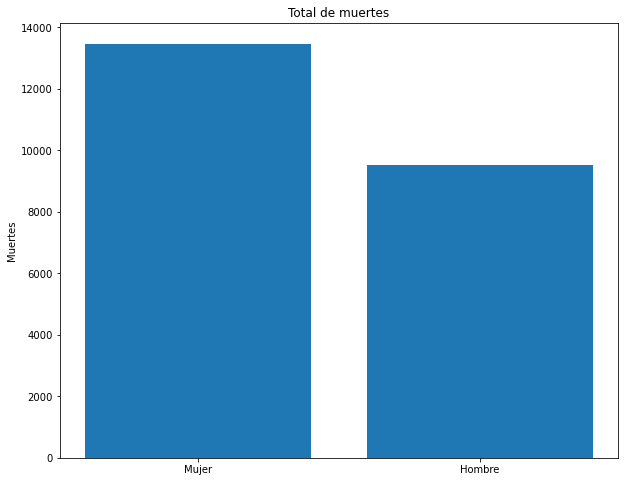

In [213]:
# Gráfica de histograma
sex = list(df['SEXO'].unique())
muertes_sex = np.zeros(2)


for i in range(len(sex)):
    muertes_sex[i] = df['SEXO'].value_counts()[str(sex[i])]

# Gráfica del total de muertes por género
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10, 8))
plt.bar(sex,muertes_sex)

# Título de gráfica y de los ejes
plt.title('Total de muertes')
plt.ylabel('Muertes')
plt.show()